# Prepocessing

## import module


In [250]:
import pandas as pd # we are changing num to 0 and 1's cuz we only care if you are going to have a 
import numpy as np # CAD not what type it is. # target, 0, 1
from pandas import read_excel
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import functools
from sklearn.ensemble import BaggingClassifier
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import pytest
import ipytest
ipytest.autoconfig()



# the number of features to be selected by each algorithm
K = 13

# add the IOError exception to deal with IOError
try:
    f = open("columnNamesUCI.txt", "r")
    file_str = f.read()
except IOError:
    print("\nError: can't read or find the header file columnNamesUCI.txt\n")
else:
    print("\nRead header file successfully\n")
    f.close()
    names = file_str.split("\n")
    print(names)





Read header file successfully

['id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp', 'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm', 'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 'restckm', 'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk']


## Read the file and print

In [251]:
# read the input file and handler IOError
fname = "updated_cleveland.data.xlsx"
try:
    dataframe = read_excel(fname, header = None, names=names)
except IOError:
    print("\nError: can't read or find the input file\n",fname)
else:
    print("\nRead the input file",fname,"sucessfully\n")
    print(dataframe)
    print("\n\nThe result column is: \n\n",dataframe.num)


Read the input file updated_cleveland.data.xlsx sucessfully

      id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0      1    0   63    1       -9        -9       -9       -9   1       145   
1      2    0   67    1       -9        -9       -9       -9   4       160   
2      3    0   67    1       -9        -9       -9       -9   4       120   
3      4    0   37    1       -9        -9       -9       -9   3       130   
4      6    0   41    0       -9        -9       -9       -9   2       130   
..   ...  ...  ...  ...      ...       ...      ...      ...  ..       ...   
277  294    0   39    0       -9        -9       -9       -9   3       138   
278  295    0   57    1       -9        -9       -9       -9   2       154   
279  296    0   58    0       -9        -9       -9       -9   4       130   
280  297    0   57    1       -9        -9       -9       -9   4       110   
281  298    0   47    1       -9        -9       -9       -9   3       130   

 

## Deal with the empty cell

In [252]:
# fill empty cell with NaN
for i in range(dataframe.shape[0]):
    for column in dataframe.columns:
        if dataframe.at[i, column] == -9:
            dataframe.loc[i, column] = np.nan
# we fill NaN value with the mean of the column containning NaN
df = dataframe.fillna(dataframe.mean())
# we drop the column that contains all NaN value
df = df.dropna(axis=1,how='all')
print("\nThe table after dealing with empty cell\n\n",df)


The table after dealing with empty cell

       id  ccf  age  sex  cp  trestbps  htn  chol  cigs  years  ...  laddist  \
0      1    0   63    1   1       145    1   233  50.0   20.0  ...        1   
1      2    0   67    1   4       160    1   286  40.0   40.0  ...        2   
2      3    0   67    1   4       120    1   229  20.0   35.0  ...        1   
3      4    0   37    1   3       130    0   250   0.0    0.0  ...        1   
4      6    0   41    0   2       130    1   204   0.0    0.0  ...        1   
..   ...  ...  ...  ...  ..       ...  ...   ...   ...    ...  ...      ...   
277  294    0   39    0   3       138    1   220  20.0   23.0  ...        1   
278  295    0   57    1   2       154    0   232  40.0   35.0  ...        1   
279  296    0   58    0   4       130    1   197   0.0    0.0  ...        1   
280  297    0   57    1   4       110    1   335  20.0   15.0  ...        1   
281  298    0   47    1   3       130    1   253   0.0    0.0  ...        1   

     cxm

## Remove the column which less impact on the prediction

In [253]:
# we drop dummy column because it is trestbps column, the others is not used for prediction
df_copy = df
try:
    df = df.drop(['dummy', 'id', 'ekgyr', 'ekgday', 'ekgmo', 'ccf', 'cmo', 'cday', 'cyr'], axis=1)
except KeyError:
    print("\nThere are some id not in the dataset\n")
    df = df_copy
else:
    print("\remove successfully\n")
print("\nShape of the data after removing the unpredicted column\n",df.shape)

myGenderColumn = df["sex"]
myExangColumn = df["exang"]
myFBSColumn = df["fbs"]
myResult = df["num"]


# take 4 important columns we don't want to be eliminate by variance thredshoud from the dataframe
df = df.drop(["sex","exang","fbs","num"],axis=1)
# perform variance thredshold
selector = VarianceThreshold(0.225)
selector.fit(df)
df= df[df.columns[selector.get_support()]]
# add the 4 column back
df = df.join(myExangColumn)
df = df.join(myFBSColumn)
df = df.join(myGenderColumn)
df = df.join(myResult)
print("\nShape of the column after removing the low variance column\n",df.shape)


emove successfully


Shape of the data after removing the unpredicted column
 (282, 46)

Shape of the column after removing the low variance column
 (282, 28)


## normalize the data

In [254]:
# returns a numpy array
x = df.values
df_temp = df
# normalize data
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x)
x_scaled = min_max_scaler.transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns)
# make value in result column a 0,1. Turn it into binary classification
df.loc[df["num"] > 0, "num"] = 1
print(df)

          age        cp  trestbps  htn      chol      cigs     years  famhist  \
0    0.708333  0.000000  0.481132  1.0  0.244292  0.505051  0.370370      1.0   
1    0.791667  1.000000  0.622642  1.0  0.365297  0.404040  0.740741      1.0   
2    0.791667  1.000000  0.245283  1.0  0.235160  0.202020  0.648148      1.0   
3    0.166667  0.666667  0.339623  0.0  0.283105  0.000000  0.000000      1.0   
4    0.250000  0.333333  0.339623  1.0  0.178082  0.000000  0.000000      1.0   
..        ...       ...       ...  ...       ...       ...       ...      ...   
277  0.208333  0.666667  0.415094  1.0  0.214612  0.202020  0.425926      0.0   
278  0.583333  0.333333  0.566038  0.0  0.242009  0.404040  0.648148      1.0   
279  0.604167  1.000000  0.339623  1.0  0.162100  0.000000  0.000000      1.0   
280  0.583333  1.000000  0.150943  1.0  0.477169  0.202020  0.277778      1.0   
281  0.375000  0.666667  0.339623  1.0  0.289954  0.000000  0.000000      1.0   

     restecg   thaldur  ...

# Feature Selection

## Prepare data

In [255]:
y = df["num"]
X = df.drop("num",axis=1)
print("The input: \n\n",X)
print("The output: \n\n",y)

The input: 

           age        cp  trestbps  htn      chol      cigs     years  famhist  \
0    0.708333  0.000000  0.481132  1.0  0.244292  0.505051  0.370370      1.0   
1    0.791667  1.000000  0.622642  1.0  0.365297  0.404040  0.740741      1.0   
2    0.791667  1.000000  0.245283  1.0  0.235160  0.202020  0.648148      1.0   
3    0.166667  0.666667  0.339623  0.0  0.283105  0.000000  0.000000      1.0   
4    0.250000  0.333333  0.339623  1.0  0.178082  0.000000  0.000000      1.0   
..        ...       ...       ...  ...       ...       ...       ...      ...   
277  0.208333  0.666667  0.415094  1.0  0.214612  0.202020  0.425926      0.0   
278  0.583333  0.333333  0.566038  0.0  0.242009  0.404040  0.648148      1.0   
279  0.604167  1.000000  0.339623  1.0  0.162100  0.000000  0.000000      1.0   
280  0.583333  1.000000  0.150943  1.0  0.477169  0.202020  0.277778      1.0   
281  0.375000  0.666667  0.339623  1.0  0.289954  0.000000  0.000000      1.0   

     restecg 

## Feature selection model

In [256]:
def feature_select(model):
    """
    this function performs the select feature using provided model
    input: model: the model
    output: an array of selected feature
    """
    # run the selection model fit on dataset
    selector = SelectKBest(model, k=K)
    selector.fit_transform(X,y)
    features = selector.get_support(indices = True)
    return [column for column in df.columns[features]]

In [257]:
# list of selected models
models = [f_classif, mutual_info_regression, f_regression, chi2, mutual_info_classif]
# array that contains selected features of these models
selected_features = []
for model in models:
    selected_features = selected_features + feature_select(model)
# sort and count number of each feature
selected_features.sort()
# feature dict contains the feature as a key and its appearance in selected_features array as item
features_dict = {}
for feature in selected_features:
    if not feature in features_dict:
        features_dict[feature] = selected_features.count(feature)
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

# choose the features which are selected by many selector and eliminate not-known feature
features_to_use = []
for feature in sorted_features:
    if feature[1] >= 2:
        if feature[0] != 'lvx4'and feature[0] != 'lvx3' and feature[0] != 'htn' and feature[0] != 'thaltime' and feature[0] != 'met':
            features_to_use.append(feature[0])
print("\nList of feature to use: \n\n",features_to_use)


List of feature to use: 

 ['ca', 'cp', 'exang', 'oldpeak', 'slope', 'thal', 'thalach', 'sex', 'thaldur', 'restecg', 'age', 'chol']


In [258]:
X = df[features_to_use] #data used for training
# we need to store the min and range of data feature and the chosen feature for implementing normalization on website
# 's user data.
df_temp = df_temp[features_to_use]
min_max_scaler = preprocessing.MinMaxScaler()
#perform min_max scaler on copy of origin data
min_max_scaler.fit(df_temp.values)
#min_data of chosen features 
min_data = min_max_scaler.data_min_ 
#range data of chosen features
range_data = min_max_scaler.data_range_ 

def convertToString(arr):
    """
    param: arr: float array
    this function convert the float array to string array
    return: string array
    """
    modified_arr = []
    for item in arr:
        modified_arr.append(str(item))
    return modified_arr
    
min_data=convertToString(min_data)
range_data=convertToString(range_data)

separator = " "
#write the chosen feature and information about chosen feature into chosen_feature.txt
try:
    chosen_feature = open("chosen_feature.txt",'w')
except IOError:
    print("\nError! Can not find/write file chosen_feature.txt\n")
else:
    print("\nSuccessfully write to file\n")
    chosen_feature.writelines(separator.join(features_to_use)+'\n')
    chosen_feature.writelines(separator.join(min_data)+'\n')
    chosen_feature.writelines(separator.join(range_data))
    chosen_feature.close()
    print(X)


Successfully write to file

           ca        cp  exang   oldpeak  slope  thal   thalach  sex  \
0    0.000000  0.000000    0.0  0.370968    1.0  0.75  0.603053  1.0   
1    1.000000  1.000000    1.0  0.241935    0.5  0.00  0.282443  1.0   
2    0.666667  1.000000    1.0  0.419355    0.5  1.00  0.442748  1.0   
3    0.000000  0.666667    0.0  0.564516    1.0  0.00  0.885496  1.0   
4    0.000000  0.333333    0.0  0.225806    0.0  0.00  0.770992  0.0   
..        ...       ...    ...       ...    ...   ...       ...  ...   
277  0.000000  0.666667    0.0  0.000000    0.5  0.00  0.618321  0.0   
278  0.333333  0.333333    0.0  0.000000    0.0  0.00  0.709924  1.0   
279  0.000000  1.000000    0.0  0.096774    0.5  0.00  0.458015  0.0   
280  0.333333  1.000000    1.0  0.483871    0.5  1.00  0.549618  1.0   
281  0.000000  0.666667    0.0  0.000000    0.0  0.00  0.824427  1.0   

      thaldur  restecg       age      chol  
0    0.659091      1.0  0.708333  0.244292  
1    0.583333   

# Train model and test the accuracy

In [259]:
num_folds = 10
kf = KFold(n_splits = num_folds)
kf.get_n_splits(X)

10

## support function 

In [260]:
# store result of the model prediction in intermediate_dict
intermediate_dict = {"SVM": [], "LDA": [], "KNN": []}
from sklearn.model_selection import cross_val_score

def k_fold_classifier_acc_tester(clf, my_dict, nameOfColumn, X, y, filename=None):
    """
    this function trains and tests model accuracy by using K-fold method
    params: 
        clf: the model
        my_dict: store the model prediction result 
        nameOfColumn: name of column in dict
        df: data frame contain input
        df_target: output
        filename: name of the file to store the trained model which has the highest accuracy
    return: accuracy array
    """
    # array that store the accuracy of model train on each (train,test) dataset generated from k-fold methods
    accuracy_model = []
    # list of trained models on each (train,test) dataset generated from k-fold methods
    models = []
    # max_id is id of the model in the models array with the highest accuracy
    max_id = 0
    for train_index, test_index in kf.split(X, y):
        # split the (train, test) dataset
        X_train , X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # train the model on each pair of train, test set
        model = clf.fit(X_train, y_train)
        models.append(model)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
        # predict on the test set
        my_dict[nameOfColumn].extend(model.predict(X_test))
    # write the highest accuracy model to file
    if filename!=None:
        for i in range (len(accuracy_model)):
            if accuracy_model[i]>accuracy_model[max_id]:
                max_id = i
        export_model = models[max_id]
        name = filename+'.pkl'
        try:
            pickle.dump(export_model, open(name,'wb'))
        except IOError:
            print("\nCannot write the model\n",name)
        else:
            print("\nWrite model successfully\n")
    return accuracy_model
        
def plot_function(accuracy, num_folds=10):
    """
    This function plots and calculate the model accuracy
    """
    list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]
    scores = pd.DataFrame(accuracy, columns = ['Scores'])
    sns.set(style="dark", rc={"lines.linewidth": 2})
    sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
    plt.show()
    sns.set()
    accuracy_summed = functools.reduce(lambda a,b: a + b, accuracy)
    average_acc = accuracy_summed/num_folds
    print("Average accuracy: ",average_acc)
    return average_acc


## SVM model


Write model successfully

[93.10344827586206, 86.20689655172413, 85.71428571428571, 96.42857142857143, 82.14285714285714, 85.71428571428571, 75.0, 71.42857142857143, 75.0, 82.14285714285714]


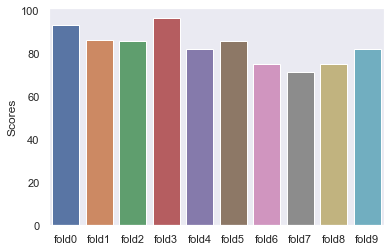

Average accuracy:  83.28817733990147


In [261]:
# train the model using SVM model
svm_clf = BaggingClassifier(base_estimator = SVC(gamma = 'auto'), n_estimators = 3, random_state = 0)
svm_accuracy_model = k_fold_classifier_acc_tester(svm_clf, intermediate_dict, "SVM", X, y, "SVM")
print(svm_accuracy_model)
svm_average_acc = plot_function(svm_accuracy_model)

## LDA model


Write model successfully

[93.10344827586206, 86.20689655172413, 82.14285714285714, 96.42857142857143, 85.71428571428571, 82.14285714285714, 75.0, 82.14285714285714, 82.14285714285714, 78.57142857142857]


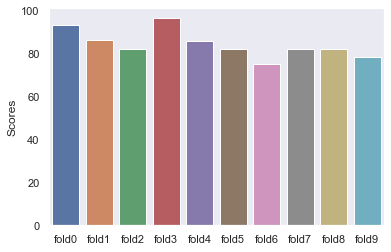

Average accuracy:  84.35960591133004


In [262]:
# train the model using LDA model
lda_clf = BaggingClassifier(base_estimator = LinearDiscriminantAnalysis(), n_estimators = 4, random_state = 0)
lda_accuracy_model = k_fold_classifier_acc_tester(lda_clf, intermediate_dict, "LDA", X, y,"LDA")
print(lda_accuracy_model)
lda_average_acc = plot_function(lda_accuracy_model)

## KNN model

In [263]:
# this code is to find the best k value for KNN model from 0 to 10
average_accuracies_KNN = [] 
num_of_neighbors_to_try_to = 10
for i in range(1, num_of_neighbors_to_try_to + 1):
    # run the for loop to find the neighbor number with highest average accuracy
    accuracy_model = []
    clf = KNeighborsClassifier(n_neighbors = i) 

    accuracy_model = k_fold_classifier_acc_tester(clf, {'KNN': []}, "KNN", X, y)
    accuracy_summed = functools.reduce(lambda a,b: a + b, accuracy_model)

    average_acc = accuracy_summed/num_folds
    average_accuracies_KNN.append(average_acc)
    
max_ave = 0
best_k_val = -1
for i in range(len(average_accuracies_KNN)):
    if max_ave < average_accuracies_KNN[i]:
        max_ave = average_accuracies_KNN[i]
        best_k_val = i + 1
        
print(best_k_val)

5



Write model successfully

[82.75862068965517, 86.20689655172413, 78.57142857142857, 92.85714285714286, 78.57142857142857, 89.28571428571429, 75.0, 89.28571428571429, 75.0, 75.0]


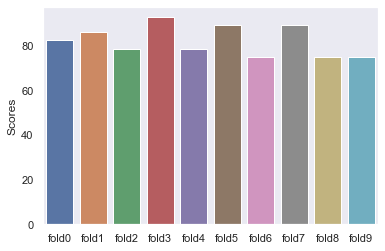

Average accuracy:  82.25369458128078


In [264]:
# train the model using KNN model
knn_clf = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 5), n_estimators = 5, random_state = 0)
knn_accuracy_model = k_fold_classifier_acc_tester(knn_clf, intermediate_dict, "KNN", X, y, "KNN")
print(knn_accuracy_model)
knn_average_acc = plot_function(knn_accuracy_model)

## SVM 2 model


Write model successfully

[93.10344827586206, 86.20689655172413, 82.14285714285714, 96.42857142857143, 85.71428571428571, 85.71428571428571, 75.0, 71.42857142857143, 75.0, 78.57142857142857]


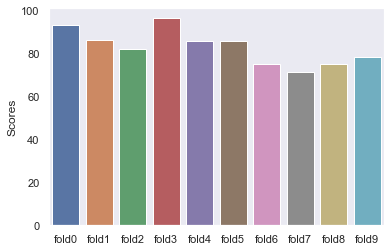

Average accuracy:  82.93103448275862


In [265]:
# train the model using SVM 2 model
# the difference between the SVM and SVM 2 is that SVM is trained on the normal input
# SVM 2 is trained on the predicted result of the first three model SVM, KNN, LDA
intermediate_df = pd.DataFrame(intermediate_dict)
svm_clf_2 = BaggingClassifier(base_estimator = SVC(kernel = 'rbf', gamma = 'auto'), n_estimators = 4, random_state = 0)
svm_accuracy_model_2 = k_fold_classifier_acc_tester(svm_clf_2, {'NA':[]}, "NA", intermediate_df, y, "SVM2")
print(svm_accuracy_model_2)
svm_average_acc_2 = plot_function(svm_accuracy_model_2)

## Voting model

In [266]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


Write model successfully

[93.10344827586206, 86.20689655172413, 82.14285714285714, 96.42857142857143, 82.14285714285714, 85.71428571428571, 75.0, 85.71428571428571, 78.57142857142857, 78.57142857142857]


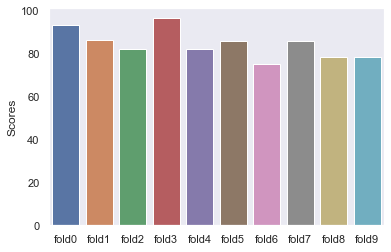

Average accuracy:  84.35960591133004


In [267]:
# train the model using Voting model with the candidate models: SVM, KNN, LDA
estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
voting_clf = VotingClassifier(estimators = estimators, voting='hard')
voting_accuracy_model = k_fold_classifier_acc_tester(voting_clf, {'NA':[]}, "NA", X, y, "Voting")
print(voting_accuracy_model)
voting_average_acc = plot_function(voting_accuracy_model)

## Voting 2 model


Write model successfully

[93.10344827586206, 86.20689655172413, 82.14285714285714, 96.42857142857143, 82.14285714285714, 85.71428571428571, 75.0, 71.42857142857143, 75.0, 78.57142857142857]


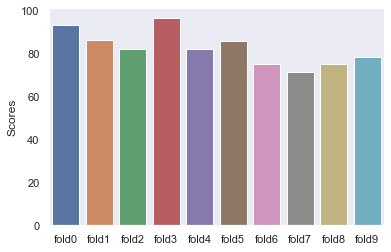

Average accuracy:  82.57389162561576


In [268]:
# train the model using Voting 2 model with the candidate models: SVM, KNN, LDA
# the difference with the Voting and Voting 2 models is that 
# Voting model is trained on the normal input
# Voting 2 model is trained on the input which is the predicted result of the SVM, KNN, LDA models
estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
voting_clf_2 = VotingClassifier(estimators = estimators, voting='hard')
voting_accuracy_model_2 = k_fold_classifier_acc_tester(voting_clf_2, {'NA':[]}, "NA", intermediate_df, y, "Voting2")
print(voting_accuracy_model_2)
voting2_average_acc = plot_function(voting_accuracy_model_2)

## Accuracy Overview

The average accuracy: 

          SVM        LDA        KNN      SVM_2     voting   voting_2
0  83.288177  84.359606  82.253695  82.931034  84.359606  82.573892


,SVM,LDA,KNN,SVM_2,voting,voting_2
0,93.103448,93.103448,82.758621,93.103448,93.103448,93.103448
1,86.206897,86.206897,86.206897,86.206897,86.206897,86.206897
2,85.714286,82.142857,78.571429,82.142857,82.142857,82.142857
3,96.428571,96.428571,92.857143,96.428571,96.428571,96.428571
4,82.142857,85.714286,78.571429,85.714286,82.142857,82.142857
5,85.714286,82.142857,89.285714,85.714286,85.714286,85.714286
6,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
7,71.428571,82.142857,89.285714,71.428571,85.714286,71.428571
8,75.000000,82.142857,75.000000,75.000000,78.571429,75.000000
9,82.142857,78.571429,75.000000,78.571429,78.571429,78.571429


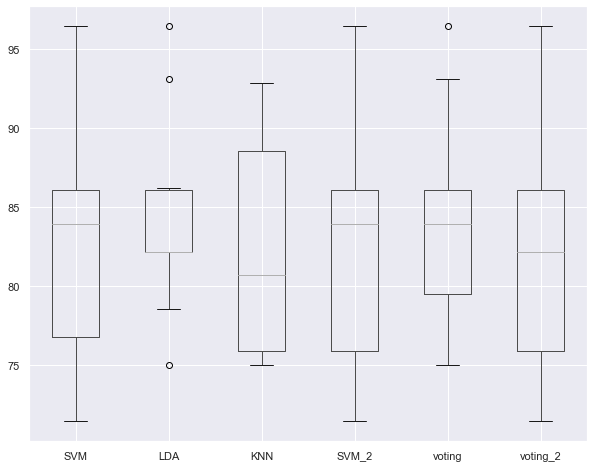

In [269]:
# overview average accuracy of the six training models
average_accuracy_dict = {'SVM': [svm_average_acc], 'LDA': [lda_average_acc], 'KNN': [knn_average_acc],'SVM_2': [svm_average_acc_2], 'voting':[voting_average_acc], 'voting_2':[voting2_average_acc]}
average_acc_df = pd.DataFrame(average_accuracy_dict)
print("The average accuracy: \n\n",average_acc_df)
accuracy_boxplot_dict = {'SVM': svm_accuracy_model, 'LDA': lda_accuracy_model, 'KNN': knn_accuracy_model, 'SVM_2': svm_accuracy_model_2 , 'voting':voting_accuracy_model, 'voting_2':voting_accuracy_model_2}
boxplot_df = pd.DataFrame(accuracy_boxplot_dict)
accuracy_boxplot = boxplot_df.boxplot(figsize=(10,8))
boxplot_df

# Test Accuracy on other dataset

In [270]:
fname = "updated_hungarian.xlsx"
try:
    dataframe = read_excel(fname, header = None, names=names)
except IOError:
    print("\nError! Can not read the file\n", fname)
else:
    print("\nSuccessfully ready the file\n")
    print("The origin data: \n\n\n",dataframe)


# fill empty cell with NaN
for i in range(dataframe.shape[0]):
    for column in dataframe.columns:
        if dataframe.at[i, column] == -9:
            dataframe.loc[i, column] = np.nan
# we fill NaN value with the mean of the column containning NaN
df = dataframe.fillna(dataframe.mean())
# we drop the column that contains all NaN value
df = df.dropna(axis=1,how='all')
print("\n\n\nThe table after dealing with empty cell\n\ng",df)


# we drop dummy column because it is trestbps column, the others is not used for prediction
df = df.drop(['dummy', 'id', 'ekgyr', 'ekgday', 'ekgmo', 'ccf', 'cmo', 'cday', 'cyr'], axis=1)
print("\n\n\nShape of the data after removing the unpredicted column",df.shape)


# returns a numpy array
x = df.values
df_temp = df
# normalize data
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x)
x_scaled = min_max_scaler.transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns)
# make value in result column a 0,1. Turn it into binary classification
df.loc[df["num"] > 0, "num"] = 1
print("After normalize the data",df)


Successfully ready the file

The origin data: 


        id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0    1254    0   40    1        1         0        0       -9   2       140   
1    1255    0   49    0        1         0        0       -9   3       160   
2    1256    0   37    1        1         0        0       -9   2       130   
3    1257    0   48    0        1         1        1       -9   4       138   
4    1258    0   54    1        1         0        1       -9   3       150   
..    ...  ...  ...  ...      ...       ...      ...      ...  ..       ...   
289  1053    0   48    0        0         0        0       -9   2        -9   
290  1054    0   36    1        1         0        0       -9   2       120   
291  5001    0   48    1        0         0        0       -9   3       110   
292  5000    0   47    0        0         0        0       -9   2       140   
293  5002    0   53    1        1         1        1       -9   4       130   



In [ ]:
X = df[features_to_use]
y = df['num']
X

In [271]:
# run trainning process and compute accuracy score of each models
svm_clf_score = svm_clf.score(X, y) * 100
lda_clf_score = lda_clf.score(X, y) * 100
knn_clf_score = knn_clf.score(X, y) * 100
voting_clf_score = voting_clf.score(X, y) * 100
# compute the input for voting 2 and svm 2 models
svm_clf_predictions = svm_clf.predict(X)
lda_clf_predictions = lda_clf.predict(X)
knn_clf_predictions = knn_clf.predict(X)
voting_clf_prediction = voting_clf.predict(X)
# construct intermediate_dict as the input for voting 2 and svm 2
intermediate_dict = {'SVM': svm_clf_predictions, 'LDA': lda_clf_predictions, 'KNN': knn_clf_predictions}
# wrap intermediate_dict with DataFrame
intermediate_df = pd.DataFrame(intermediate_dict)
intermediate_df_copy = intermediate_df
# run training and compute accuracy score of voting 2 and svm 2
voting_clf_score2 = voting_clf_2.score(intermediate_df, y) * 100
voting_clf_prediction_2 = voting_clf_2.predict(intermediate_df)

svm_clf_score2 = svm_clf_2.score(intermediate_df,y) * 100
svm_clf_predictions_2 = svm_clf_2.predict(intermediate_df)

# add prediction for SVM 2, voting and voting 2
intermediate_dict['SVM_2'] = svm_clf_predictions_2
intermediate_dict['voting'] = voting_clf_prediction
intermediate_dict['voting_2'] = voting_clf_prediction_2

intermediate_df = pd.DataFrame(intermediate_dict)

models = {'SVM': svm_clf, 'LDA': lda_clf, 'KNN': knn_clf, 'SVM_2': svm_clf_2, 'voting': voting_clf, 'voting_2': voting_clf_2}

print("svm accuracy score: ",svm_clf_score)
print("lda accuracy score: ",lda_clf_score)
print("knn accuracy score: ",knn_clf_score)
print("svm 2 accuracy score: ",svm_clf_score2)
print("voting accuracy score: ",voting_clf_score)
print("voting 2 accuracy score: ",voting_clf_score2)

svm accuracy score:  84.75177304964538
lda accuracy score:  85.46099290780141
knn accuracy score:  85.46099290780141
svm 2 accuracy score:  85.46099290780141
voting accuracy score:  86.17021276595744
voting 2 accuracy score:  85.1063829787234


,SVM,LDA,KNN,SVM_2,voting,voting_2,SVM_other,LDA_other,KNN_other,SVM_2_other,voting_other,voting_2_other
0,83.288177,84.359606,82.253695,82.931034,84.359606,82.573892,84.751773,85.460993,85.460993,85.460993,86.170213,85.106383


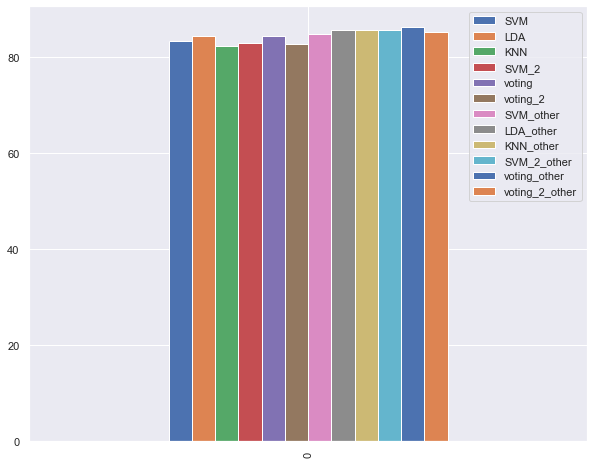

In [272]:
# plot the chart for average accuracy between 6 models on 2 datasets
accuracy_dict = {'SVM': [svm_average_acc], 'LDA': [lda_average_acc], 'KNN': [knn_average_acc], 'SVM_2': [svm_average_acc_2], 'voting':[voting_average_acc], 'voting_2':[voting2_average_acc],'SVM_other': [svm_clf_score], 'LDA_other': [lda_clf_score], 'KNN_other': [knn_clf_score], 'SVM_2_other': [svm_clf_score2], 'voting_other':[voting_clf_score], 'voting_2_other':[voting_clf_score2]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df.plot.bar(figsize=(10,8))
accuracy_df

# Precision and Recall

In [273]:
def recall_precision(predict, real):
    """
    This function compute the recall and precision on prediction and real result
    Input: predict: predict output array 
           real: real output array
    Output: precision and recall (integer)
    """
    if (len(real)==len(predict) and len(real)>0):
        true_positive = 0
        false_positive = 0
        false_negative = 0
        for i in range (len(predict)):
            if predict[i] == 1:
                if real[i] == 1:
                    true_positive+=1
                else:
                    false_positive+=1
            else:
                if real[i] == 1:
                    false_negative+=1
        precision = true_positive/(true_positive+false_positive)
        recall = true_positive/(true_positive+false_negative)
        return precision, recall
    else:
        print("Error!.The length of 2 input arrays may be same and larger than 0")
    
    

In [274]:
# calculate the precision and recall for each models on the second dataset
methods = intermediate_df.columns.values
recall_precision_acc = {}
for method in methods:
    precision, recall = recall_precision(intermediate_dict[method],y.values)
    recall_precision_acc[method] = [precision, recall]
recall_precision_acc_df = pd.DataFrame(recall_precision_acc,index=['Precision','Recall'])
recall_precision_acc_df
    

,SVM,LDA,KNN,SVM_2,voting,voting_2
Precision,0.853448,0.862069,0.868421,0.862069,0.877193,0.854701
Recall,0.792000,0.800000,0.792000,0.800000,0.800000,0.800000


# AUCROC

model SVM :    auc:       84.1859872611465 
               auc_roc:   84.1859872611465
model LDA :    auc:       84.90445859872612 
               auc_roc:   84.90445859872612
model KNN :    auc:       84.82292993630574 
               auc_roc:   84.82292993630574
model SVM_2 :    auc:       84.90445859872612 
               auc_roc:   84.90445859872612
model voting :    auc:       85.54140127388536 
               auc_roc:   85.54140127388536
model voting_2 :    auc:       84.5859872611465 
               auc_roc:   84.5859872611465


,SVM,LDA,KNN,SVM_2,voting,voting_2
0,84.185987,84.904459,84.82293,84.904459,85.541401,84.585987


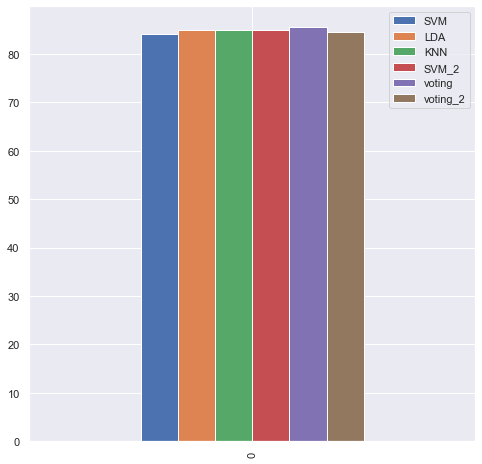

In [275]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc_dict = {}
def auroc_score(method):
    """
    this function calculates the aucroc score for each model
    """
    # check model and set the input_data because the voting 2 and svm 2 use different input data
    input_data = X
    if method == 'SVM_2' or method == 'voting_2':
        input_data = intermediate_df_copy
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, models[method].predict(input_data))
    auc_model = auc(false_positive_rate,true_positive_rate)*100
    auc_roc_model = roc_auc_score(y, models[method].predict(input_data))*100
    print('model '+method+' :'+'    auc:      ',auc_model,'\n               auc_roc:  ',auc_roc_model)
    
    return auc_model

for method in methods:
    auc_dict[method] = [auroc_score(method)]
auc_df = pd.DataFrame(auc_dict)
auc_df.plot.bar(figsize=(8,8))
auc_df

In [277]:
%%run_pytest[clean]
 print(recall_precision([0,1,1,0,1],[0,1,1,0,1]))


def test_recall_precision():
    # testcase for reacall_precision function
    assert recall_precision([0,1,1,0,1],[0,1,1,0,1])==(1.0,1.0)
    assert recall_precision([0,1,0,0,1],[0,0,1,0,1])==(0.5,0.5)
    assert recall_precision([0,1,1,1,1],[0,0,1,0,1])==(0.5,1.0)
    assert recall_precision([0,1,1,1,1,0,1],[0,0,1,0,1,1,1.0])==(0.6,0.75)
    # check if the wrong input, function should return None
    assert recall_precision([],[])==None
    assert recall_precision([1,0],[0])==None
    
    
def test_convertToString():
    # testcase for the convertToString function
    assert convertToString([1,2,3,4])==['1', '2', '3', '4']
    assert convertToString([1,2,3])== ['1','2','3']
    assert convertToString([])==[]
    
    

(1.0, 1.0)
..                                                                                                               [100%]
2 passed in 0.01s
